In [1]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [13]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
#for word embedding
import gensim
from gensim.models import Word2Vec

In [15]:
#LOADING DATA
df_train=pd.read_csv("train.csv",sep=",")
df_test=pd.read_csv("test.csv",sep=",")
df_train


,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
2,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
3,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,Subscribe to my channel ﻿,1
4,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28T16:30:13,and u should.d check my channel and tell me wh...,1
...,...,...,...,...,...
1152,_2viQ_Qnc6_RKHVetk9kLzx8ZC62_J7y73FWFSBTe8Q,ThirdDegr3e,2013-07-13T20:47:40.793000,**CHECK OUT MY NEW MIXTAPE**** **CHECK OUT MY ...,1
1153,_2viQ_Qnc68TufyXKiTwky80ewSPbhRiD5XFHrJH9lg,Ysobel Schofield,2013-07-13T20:17:25.181000,Waka waka she rules,0
1154,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0
1155,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0


In [16]:
df_test

,ID,COMMENT_ID,AUTHOR,DATE,CONTENT
0,0,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...
1,1,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com
2,2,LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc,Jason Haddad,2013-11-26T02:55:11,"Hey, check out my new website!! This site is a..."
3,3,z122wfnzgt30fhubn04cdn3xfx2mxzngsl40k,Bob Kanowski,2013-11-28T12:33:27,i turned it on mute as soon is i came on i jus...
4,4,z13ttt1jcraqexk2o234ghbgzxymz1zzi04,Cony,2013-11-28T16:01:47,You should check my channel for Funny VIDEOS!!﻿
...,...,...,...,...,...
794,794,_2viQ_Qnc6-jk58CPwBnqfbM6oByJH5oPvCtKecLQyo,Shadrach Grentz,2013-07-14T03:11:20.243000,Hey Music Fans I really appreciate all of you ...
795,795,_2viQ_Qnc689m-WiwOwvrQU7LvkLAgspnfXL8ovE0ME,TheHotChocolate,2013-07-13T18:26:37.017000,she is sooooo beautiful!
796,796,_2viQ_Qnc6_1Hq9MGlefkBIszt9rYD3S_CozADvMhQ4,Dinova Sharon,2013-07-13T14:44:00.700000,well done shakira
797,797,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...


1    586
0    571
Name: CLASS, dtype: int64


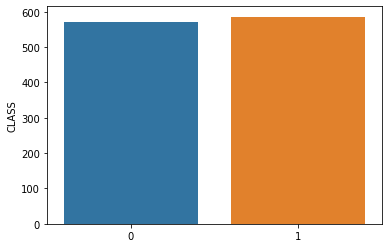

In [17]:
x=df_train['CLASS'].value_counts()
print(x)
sns.barplot(x.index,x)

In [18]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1157 non-null   object
 1   AUTHOR      1157 non-null   object
 2   DATE        1019 non-null   object
 3   CONTENT     1157 non-null   object
 4   CLASS       1157 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 45.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          799 non-null    int64 
 1   COMMENT_ID  799 non-null    object
 2   AUTHOR      799 non-null    object
 3   DATE        692 non-null    object
 4   CONTENT     799 non-null    object
dtypes: int64(1), object(4)
memory usage: 31.3+ KB


In [19]:
#Missing value
df_train.isna().sum()

COMMENT_ID      0
AUTHOR          0
DATE          138
CONTENT         0
CLASS           0
dtype: int64

22.12627986348123
8.84938704028021


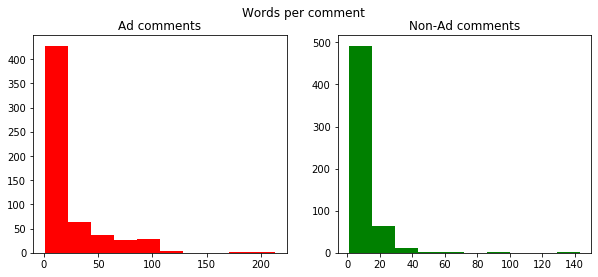

In [20]:
#Number of words in a comment
df_train['word_count'] = df_train['CONTENT'].apply(lambda x: len(str(x).split()))
print(df_train[df_train['CLASS']==1]['word_count'].mean()) #Ad tweets
print(df_train[df_train['CLASS']==0]['word_count'].mean()) #Non-Ad tweets

#Plotting word count
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
train_words=df_train[df_train['CLASS']==1]['word_count']
ax1.hist(train_words,color='red')
ax1.set_title('Ad comments')
train_words=df_train[df_train['CLASS']==0]['word_count']
ax2.hist(train_words,color='green')
ax2.set_title('Non-Ad comments')
fig.suptitle('Words per comment')
plt.show()

In [21]:
#Number of characters in a comment
df_train['char_count'] = df_train['CONTENT'].apply(lambda x: len(str(x)))
print(df_train[df_train['CLASS']==1]['char_count'].mean()) #Ad comments
print(df_train[df_train['CLASS']==0]['char_count'].mean()) #Non-Ad comments

138.26621160409556
49.08406304728546


In [22]:
#Text pre-processing(stop-word,stemming,lemmatization)
#convert to lowercase, strip and remove punctuations
def preprocess(CONTENT):
    CONTENT=CONTENT.lower() 
    CONTENT=CONTENT.strip()  
    CONTENT=re.compile('<.*?>').sub('', CONTENT) 
    CONTENT = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', CONTENT)  
    CONTENT = re.sub('\s+', ' ', CONTENT)  
    CONTENT = re.sub(r'\[[0-9]*\]',' ',CONTENT) 
    CONTENT=re.sub(r'[^\w\s]', '', str(CONTENT).lower().strip())
    CONTENT = re.sub(r'\d',' ',CONTENT) 
    CONTENT = re.sub(r'\s+',' ',CONTENT) 
    return CONTENT

 
# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)
#LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

#Final
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))
df_train['CLEAN_CONTENT'] = df_train['CONTENT'].apply(lambda x: finalpreprocess(x))
df_train.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,word_count,char_count,CLEAN_CONTENT
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,8,56,huh anyway check tube channel kobyoshi
1,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,11,48,shake sexy as channel enjoy
2,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1,5,39,watch v vtarggvgtwq check
3,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,Subscribe to my channel ﻿,1,5,25,subscribe channel
4,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28T16:30:13,and u should.d check my channel and tell me wh...,1,14,67,u check channel tell next


In [32]:
#Word2vec model
df_train['CLEAN_CONTENT_tok']=[nltk.word_tokenize(i) for i in df_train['CLEAN_CONTENT']] #convert preprocessed sentence to tokenized sentence
model = Word2Vec(df_train['CLEAN_CONTENT_tok'],min_count=1) 

w2v = dict(zip(model.wv.index_to_key, model.wv))  #combination of word and its vector
#for converting sentence to vectors/numbers from word vectors result by Word2Vec
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [39]:
#VECTORIZATION
#Splitting training data into train and test
X_train, X_test, y_train, y_test = train_test_split(df_train["CLEAN_CONTENT"],df_train["CLASS"],test_size=0.25,shuffle=True)
#Word2Vec
# Word2Vec runs on tokenized sentences
X_train_tok= [nltk.word_tokenize(i) for i in X_train]  
X_test_tok= [nltk.word_tokenize(i) for i in X_test]

#tfidf runs on non-tokenized sentences unlike word2vec
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

#Word2vec
# Fit and transform
modelw = MeanEmbeddingVectorizer(w2v)
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_test_vectors_w2v = modelw.transform(X_test_tok)

In [40]:
#MACHINE LEARNING
#LR on tfidf
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)
lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  
#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_test_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_test_vectors_tfidf)[:,1]
print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       137
           1       0.97      0.93      0.95       153

    accuracy                           0.95       290
   macro avg       0.95      0.95      0.95       290
weighted avg       0.95      0.95      0.95       290

Confusion Matrix: [[133   4]
 [ 11 142]]
AUC: 0.9824912933543247


In [41]:
#LR on w2v
#FITTING THE CLASSIFICATION MODEL using Logistic Regression (W2v)
lr_w2v=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_w2v.fit(X_train_vectors_w2v, y_train)  #model
#Predict y value for test dataset
y_predict = lr_w2v.predict(X_test_vectors_w2v)
y_prob = lr_w2v.predict_proba(X_test_vectors_w2v)[:,1]
print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.65      0.69      0.67       137
           1       0.71      0.67      0.69       153

    accuracy                           0.68       290
   macro avg       0.68      0.68      0.68       290
weighted avg       0.68      0.68      0.68       290

Confusion Matrix: [[ 94  43]
 [ 50 103]]
AUC: 0.7514908639854969


In [42]:
#Naive Bayes
#tfidf
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train)  
#Predict y value for test dataset
y_predict = nb_tfidf.predict(X_test_vectors_tfidf)
y_prob = nb_tfidf.predict_proba(X_test_vectors_tfidf)[:,1]
print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       137
           1       0.90      0.93      0.92       153

    accuracy                           0.91       290
   macro avg       0.91      0.91      0.91       290
weighted avg       0.91      0.91      0.91       290

Confusion Matrix: [[122  15]
 [ 11 142]]
AUC: 0.9772434521253757


In [47]:
#Applying LR on test set(since it is the best fit)
df_test['CLEAN_CONTENT'] = df_test['CONTENT'].apply(lambda x: finalpreprocess(x)) #preprocess the data
X_test=df_test['CLEAN_CONTENT'] 
X_vector=tfidf_vectorizer.transform(X_test) #converting X_test to vector
y_predict = lr_tfidf.predict(X_vector)      #use the trained model on X_vector
y_prob = lr_tfidf.predict_proba(X_vector)[:,1]
df_test['predict_prob']= y_prob
df_test['CLASS']= y_predict
print(df_test.head())
final=df_test[['ID',"CLASS"]].reset_index(drop=True)

final.to_csv('submission1.csv')

   ID                                   COMMENT_ID            AUTHOR  \
0   0  LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A       adam riyati   
1   1  LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8  Evgeny Murashkin   
2   2  LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc      Jason Haddad   
3   3        z122wfnzgt30fhubn04cdn3xfx2mxzngsl40k      Bob Kanowski   
4   4          z13ttt1jcraqexk2o234ghbgzxymz1zzi04              Cony   

                  DATE                                            CONTENT  \
0  2013-11-07T12:37:15  Hey guys check out my new channel and our firs...   
1  2013-11-08T17:34:21             just for test I have to say murdev.com   
2  2013-11-26T02:55:11  Hey, check out my new website!! This site is a...   
3  2013-11-28T12:33:27  i turned it on mute as soon is i came on i jus...   
4  2013-11-28T16:01:47    You should check my channel for Funny VIDEOS!!﻿   

                                       CLEAN_CONTENT  predict_prob  target  \
0  hey guy check new chann

,ID,CLASS
0,0,1
1,1,1
2,2,1
3,3,0
4,4,1
...,...,...
794,794,1
795,795,0
796,796,0
797,797,0
